In [21]:
%matplotlib inline
from yahoo_finance import Share
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
from dateutil import parser
from sklearn import linear_model

In [3]:
spy = Share('SPY')
voo = Share('VOO')
ibb = Share('IBB')
kre = Share('KRE')
smh = Share('SMH')
# botz = Share('BOTZ')
pff = Share('PFF')
jnk = Share('JNK')

In [4]:
spy_hist = spy.get_historical('2014-04-25', '2017-02-01')
voo_hist = voo.get_historical('2014-04-25', '2017-02-01')
ibb_hist = ibb.get_historical('2014-04-25', '2017-02-01')
kre_hist = kre.get_historical('2014-04-25', '2017-02-01')
smh_hist = smh.get_historical('2014-04-25', '2017-02-01')
#botz_hist = botz.get_historical('2014-04-25', '2017-02-01')
pff_hist = pff.get_historical('2014-04-25', '2017-02-01')
jnk_hist = jnk.get_historical('2014-04-25', '2017-02-01')

def floatize(a):
    a['Open'] = float(a['Open'])
    a['Close'] = float(a['Close'])
    return a

spy_hist = [floatize(s) for s in spy_hist]
spy_time = [parser.parse(s['Date']) for s in spy_hist]

voo_hist = [floatize(s) for s in voo_hist]
voo_time = [parser.parse(s['Date']) for s in voo_hist]

ibb_hist = [floatize(s) for s in ibb_hist]
ibb_time = [parser.parse(s['Date']) for s in ibb_hist]

kre_hist = [floatize(s) for s in kre_hist]
kre_time = [parser.parse(s['Date']) for s in kre_hist]

smh_hist = [floatize(s) for s in smh_hist]
smh_time = [parser.parse(s['Date']) for s in smh_hist]

pff_hist = [floatize(s) for s in pff_hist]
pff_time = [parser.parse(s['Date']) for s in pff_hist]

jnk_hist = [floatize(s) for s in jnk_hist]
jnk_time = [parser.parse(s['Date']) for s in jnk_hist]

In [5]:
spy_return = [share['Close']-share['Open'] for share in spy_hist]

voo_return = [share['Close']-share['Open'] for share in voo_hist]

ibb_return = [share['Close']-share['Open'] for share in ibb_hist]

kre_return = [share['Close']-share['Open'] for share in kre_hist]

smh_return = [share['Close']-share['Open'] for share in smh_hist]

pff_return = [share['Close']-share['Open'] for share in pff_hist]

jnk_return = [share['Close']-share['Open'] for share in jnk_hist]

In [12]:
normalized_spy = np.asarray(spy_return, dtype=np.float64) / float(spy_return[0])

normalized_voo = np.asarray(voo_return, dtype=np.float64) / float(voo_return[0])

normalized_ibb = np.asarray(ibb_return, dtype=np.float64) / float(ibb_return[0])

normalized_kre = np.asarray(kre_return, dtype=np.float64) / float(kre_return[0])

normalized_smh = np.asarray(smh_return, dtype=np.float64) / float(smh_return[0])

normalized_pff = np.asarray(pff_return, dtype=np.float64) / float(pff_return[0])

normalized_jnk = np.asarray(jnk_return, dtype=np.float64) / float(jnk_return[0])

In [17]:
returns = [normalized_spy, normalized_voo, normalized_ibb, normalized_kre, normalized_smh,
          normalized_pff, normalized_jnk]

weights = np.asarray([10/46, 11/46, 5/46, 5/46, 5/46, 5/46, 5/46])

corr_matrix = np.corrcoef(returns)
portfolio_volatility = np.sqrt(weights.T.dot(corr_matrix).dot(weights))

In [18]:
portfolio_volatility

0.52390829708374465

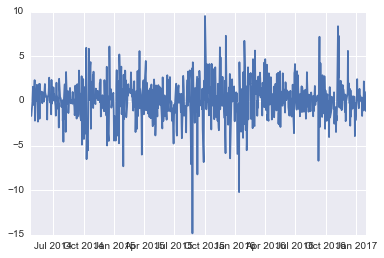

In [8]:
sns.plt.plot(spy_time, normalized_spy)

In [37]:
volatility = np.std(normalized_spy)

In [20]:
print(corr_matrix)

[[ 1.          0.99261794  0.62744957  0.62398891 -0.69539006  0.35435557
  -0.5957737 ]
 [ 0.99261794  1.          0.62773527  0.62767143 -0.69255907  0.3614194
  -0.59808048]
 [ 0.62744957  0.62773527  1.          0.37557869 -0.47724083  0.23047905
  -0.35058289]
 [ 0.62398891  0.62767143  0.37557869  1.         -0.4388618   0.2334988
  -0.39932145]
 [-0.69539006 -0.69255907 -0.47724083 -0.4388618   1.         -0.22737315
   0.43888407]
 [ 0.35435557  0.3614194   0.23047905  0.2334988  -0.22737315  1.
  -0.40346085]
 [-0.5957737  -0.59808048 -0.35058289 -0.39932145  0.43888407 -0.40346085
   1.        ]]


In [ ]:
reg = linear_model.Lasso(alpha = 0.1)
reg.fit()

In [33]:
import numpy as np
from urllib import request
from urllib3 import urlencode
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from scipy import stats

class Stock(object):
    def __init__(self,ticker,date_range = None,position = None):
        self.ticker = ticker
        self.position = position if position is not None else None

        if date_range is not None:
            self.date_range = date_range
        else:
            # If there was no specified time interval, presume that the
            # user intends to download historical price data from the 
            # past year. Notice that the end of the time interval is 
            # today, while the start is one year in the past.
            end = datetime.datetime.now().strftime("%Y-%m-%d")
            start = (datetime.datetime.now() - datetime.timedelta(days = 365)).strftime("%Y-%m-%d")
            self.date_range = {"start" : start, "end" : end}

        try:
            self.profile = self.yahoo_download_daily()
            self.statistics = self.calculate_statistics()
        except:
            print("Invalid ticker symbol specified or else there was not an internet connection available.")
        
        
    def __str__(self):
        print_string = "Ticker: " + self.ticker + "\n"
        print_string += "Time series: From " + self.date_range["start"] + " to " + self.date_range["end"] + "\n\n"
        print_string += "Current performance:\n"
        print_string += "Date\t\tOpen\tHigh\tLow\tClose\tVolume\t\tAdjusted Close\n"

        current_date = sorted(self.profile.keys())[-1]
        current_performance = self.profile[current_date]
     
        print_string += "%s\t%.2f\t%.2f\t%.2f\t%.2f\t%7e\t%.2f\n\n" % (current_date, 
                                                                       float(current_performance["Open"]), 
                                                                       float(current_performance["High"]), 
                                                                       float(current_performance["Low"]), 
                                                                       float(current_performance["Close"]), 
                                                                       int(current_performance["Volume"]), 
                                                                       float(current_performance["Adj Close"])
                                                                       )
        print_string += "Expected return: %.4f" % self.statistics["expected_return"]
        return print_string

    def calculate_statistics(self):
        statistics = {}
        closing_prices = np.array(
            [np.float(self.profile[day]["Close"]) for day in self.profile.keys()]
            )

        # Occasionally, values of zero are obtained as an asset price. In all likelihood, this
        # value is rubbish and cannot be trusted, as it implies that the asset has no value. 
        # In these cases, we replace the reported asset price by the mean of all asset prices.
        closing_prices[closing_prices == 0] = np.mean(closing_prices)

        # Calculate the daily returns on the stock option. These calculation is
        # defined by the formula:
        #     R_t = (P_t / P_{t - 1}) - 1
        # Refer to page five of Statistics and Data Analysis for Financial 
        # Engineering. For the expected return, we simply take the mean value of
        # the calculated daily returns.
        statistics["returns"] = closing_prices[1:] / closing_prices[:-1] - 1
        statistics["log_returns"] = np.log(statistics["returns"] + 1)

        # Multiply the average daily return by the length of the time series in order to
        # obtain the expected return over the entire period.
        statistics["expected_daily_return"] = np.mean(statistics["returns"])
        statistics["expected_return"] = statistics["expected_daily_return"] * len(statistics["returns"])
        
        return statistics

    def calculate_parametric_risk(self,alpha,position = None):

        if position is None and self.position is not None:
            position = self.position
        elif position is None and self.position is None:
            print("Either specify a position for the stock object or provide one as an input parameter.")
            return np.nan

        returns = self.statistics["returns"]
        
        # Fit a t-distribution to the daily returns data using the 
        # method of maximum likelihood estimation.
        tdof, tloc, tscale = stats.t.fit(returns)
        quantile = stats.t.ppf(alpha, tdof, tloc, tscale)

        # Assuming that returns are i.i.d. with a t-distribution, it
        # can be shown that value-at-risk is calculated as:
        #      VaR_t(alpha) = -S * {mu + q_{alpha}(nu) * lambda}
        # Is this formula, S refers to the size of the position. The 
        # parameters mu, lambda, and scale are the estimated mean, 
        # scale, and degrees of freedom of the sample returns. The
        # parameter q_{alpha}(nu) is the alpha-quantile of a 
        # t-distribution with nu degrees of freedom. Refer to page 
        # 510 in Statistics and Data Analysis for Financial 
        # Engineering.
        value_at_risk = -position * (tloc + quantile * tscale)
        return value_at_risk

    def asset_closing_prices(self,array = False):
        sorted_dates = sorted(self.profile.keys())
        closing_prices = [np.float(self.profile[day]["Close"]) for day in sorted_dates]
        return np.array(closing_prices) if array else closing_prices

    def display_price(self):
        sorted_dates = sorted(self.profile.keys())
        plt.plot_date([mdates.strpdate2num('%Y-%m-%d')(day) for day in sorted_dates],
                      self.asset_closing_prices(),
                      fmt="k-o")
        plt.title(self.ticker + " Closing Prices")
        plt.ylabel("Daily Prices")
        plt.xlabel("Historical Dates")
        plt.grid(True)
        plt.show()

    def yahoo_download_daily(self):
        # Stocks are defined over a range of time, with a beginning and an end 
        # date. We use these dates to query yahoo Finance! for the relevant 
        # historical price data.
        start_date = self.date_range["start"]
        end_date = self.date_range["end"]


        # Encode the query parameters to be used in the GET request to yahoo 
        # Finance!
        yahoo = {}
        yahoo["parameters"] = urlencode({
                "s": self.ticker,
                "a": int(start_date[5:7]) - 1,
                "b": int(start_date[8:10]),
                "c": int(start_date[0:4]),
                "d": int(end_date[5:7]) - 1,
                "e": int(end_date[8:10]),
                "f": int(end_date[0:4]),
                "g": "d",
                "ignore": ".csv",
                })
        yahoo["url"] = "http://ichart.yahoo.com/table.csv?%s" % yahoo["parameters"]
        yahoo["query"] = request(yahoo["url"])
        yahoo["response"] = request.urlopen(yahoo["query"])
        yahoo["content"] = str(yahoo["response"].read().decode("utf-8").strip())

        daily_data = yahoo["content"].splitlines()
        historical_data = {}
        keys = daily_data[0].split(",")

        # For every day, create an entry in a dictionary of dates with the trading
        # volume, the closing price, the opening price, the high and the low price, 
        # and the adjusted closing price. The data structure representing the 
        # historical price data is as follows:
        #     'YYYY-MM-DD': {'Adj Close': 'float',
        #                    'Close': 'float',
        #                    'High': 'float',
        #                    'Low': 'float',
        #                    'Open': 'float',
        #                    'Volume': 'int'
        #                   }
        for day in daily_data[1:]:
            day_data = day.split(",")
            date = day_data[0]
            historical_data[date] = {
                keys[1]: day_data[1],
                keys[2]: day_data[2],
                keys[3]: day_data[3],
                keys[4]: day_data[4],
                keys[5]: day_data[5],
                keys[6]: day_data[6]
                }
        return historical_data

ImportError: cannot import name 'urlencode'

In [27]:

import numpy as np
from scipy.stats import norm

class CAPM(object):
    def __init__(self,risk_free,market,alpha = .05):

        self.risk_free = Stock(risk_free["ticker"],risk_free["date_range"]) if type(risk_free) is dict else Stock(risk_free)
        self.market = Stock(market["ticker"],market["date_range"]) if type(market) is dict else Stock(market)

        self.alpha, self.beta = {}, {}
        self.critical_value = norm.ppf(1 - alpha / 2.0)

    def __str__(self):
        if len(self.alpha.keys()) and len(self.beta.keys()):
            alpha = self.alpha
            beta = self.beta
        else:
            return "The alpha and beta coefficients were not initialized. Please call the asset regression method before continuing."


        print_string = "Capital Asset Pricing Model:\n\tCritical value: %.2f\n" % self.critical_value
        print_string += "\t\t\tValue\t\tLower Bound\tUpper Bound\n"
        print_string += "\talpha:\t\t%.4f\t\t%.4f\t\t%.4f\n" % (alpha["value"],alpha["confidence_interval"][0],
                                                                    alpha["confidence_interval"][1])
        print_string += "\tbeta:\t\t%.4f\t\t%.4f\t\t%.4f\n\n" % (beta["value"],beta["confidence_interval"][0],
                                                                    beta["confidence_interval"][1])
        
        if alpha["confidence_interval"][0] > 0:
            print_string += "\tThe CAPM reports that the security is overpriced. Asset returns are too large on average."
        elif alpha["confidence_interval"][1] < 0:
            print_string += "\tThe CAPM reports that the security is underpriced. Asset returns are too small on average."
        else:
            print_string += "\tThere CAPM reports that the security is appropriately priced."

        return print_string

    def asset_regression(self,asset_data):

        alpha, beta = {}, {}

        asset = Stock(asset_data["ticker"],asset_data["date_range"]) if type(asset_data) is dict else Stock(asset_data)
        market_premium = np.atleast_2d(self.market.statistics["returns"] - self.risk_free.statistics["returns"]).T
        asset_premium = np.atleast_2d(asset.statistics["returns"] - self.risk_free.statistics["returns"]).T

        constant = np.ones((market_premium.shape[0],1))
        covariates = np.concatenate((constant,market_premium),axis = 1)

        # Solve the capital asset pricing model in the least-squares sense. In
        # particular, wel solve the following linear model for parameters theta_0
        # and theta_1:
        #     R_{j,t} - mu_{f,t} = theta_0 + theta_1 * (R_{M,t} - mu_{f,t}) + e_{j,t}
        # Where R_{j,t} is the asset premium of the jth asset, mu_{f,t} is the
        # risk-free rate, R_{M,t} is the market premium, and e_{j,t} represents an
        # error term. Refer to page 435 in the Statistics and Data Analysis for
        # Financial Engineering.
        theta = np.linalg.lstsq(covariates,asset_premium)[0]
        residuals = asset_premium - np.dot(covariates,theta)

        # The rank of the covariates matrix is presumably two, and it is for that
        # reason that we subtract two in the denominator.
        s_squared = np.sum(residuals * residuals) / (market_premium.shape[0] - 2)

        standard_errors = np.sqrt(s_squared * np.linalg.inv(np.dot(covariates.T,covariates)))
        alpha["value"] = theta[0]
        alpha["confidence_interval"] = theta[0] + standard_errors[0,0] * self.critical_value * np.array([-1,1])

        beta["value"] = theta[1]
        beta["confidence_interval"] = theta[1] + standard_errors[1,1] * self.critical_value * np.array([-1,1])

        self.alpha = alpha
        self.beta = beta

date_range = {"start" : "2012-01-03", "end" : "2013-01-08"}
tickers = ("^IRX","^GSPC","GOOG")
capm = CAPM({"ticker" : tickers[0],"date_range" : date_range},
    {"ticker" : tickers[1],"date_range" : date_range})
capm.asset_regression({"ticker" : tickers[2],"date_range" : date_range})

print(capm)

NameError: name 'Stock' is not defined